In [ ]:
!pip install roboflow




loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 77.0, 'y': 20.5, 'width': 72.0, 'height': 41.0, 'confidence': 0.8978787660598755, 'class': 'Helmet', 'class_id': 0, 'detection_id': 'f3a1794b-195e-4df2-951f-3c436dc9983a', 'image_path': '10021.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '275', 'height': '183'}}


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="tQY6mHRPxDlpqRqVZ2Aj")
project = rf.workspace("deep-learning-sjxoy").project("helmet-detection-kkpno")
version = project.version(1)
dataset = version.download("yolov5")
model = project.version(1).model
local_image_path = "10026.jpg"
prediction = model.predict(local_image_path, confidence=40, overlap=30).json()

# Print the prediction results
print(prediction)
data=prediction
class_value = data["predictions"][0]["class"]
if class_value=="Helmet":
  print ("helmet found")
else:
  print("not found")


# Save the visualization of the prediction



loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 82.0, 'y': 110.0, 'width': 136.0, 'height': 84.0, 'confidence': 0.5825031995773315, 'class': 'Helmet', 'class_id': 0, 'detection_id': 'cb6a586d-8c6d-4db8-bd51-78c11c279dce', 'image_path': '10026.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '185', 'height': '273'}}
helmet found


In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image
from roboflow import Roboflow
import ipywidgets as widgets

def predict_image(image):
    image_path = "uploaded_image.jpg"
    image.save(image_path)

    rf = Roboflow(api_key="tQY6mHRPxDlpqRqVZ2Aj")
    project = rf.workspace("deep-learning-sjxoy").project("helmet-detection-kkpno")
    version = project.version(1)
    model = project.version(1).model
    prediction = model.predict(image_path, confidence=40, overlap=30).json()

    # Print the prediction results
    print(prediction)
    data = prediction
    class_value = data["predictions"][0]["class"]
    if class_value == "Helmet":
        print("Helmet found")
    else:
        print("Helmet not found")

def on_file_upload(change):
    img = Image.open(BytesIO(uploader.data[-1]))
    predict_image(img)

uploader = widgets.FileUpload(accept='image/*', multiple=False)
uploader.observe(on_file_upload, names='_counter')

display(uploader)


FileUpload(value={}, accept='image/*', description='Upload')

loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 39.0, 'y': 16.5, 'width': 40.0, 'height': 27.0, 'confidence': 0.6322436928749084, 'class': 'Helmet', 'class_id': 0, 'detection_id': '71848b8c-fe61-4088-ae72-cb87e6bbcaeb', 'image_path': 'uploaded_image.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '100', 'height': '100'}}
Helmet found


In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image
from roboflow import Roboflow
import ipywidgets as widgets
from IPython.display import display

def predict_image(image):
    image_path = "uploaded_image.jpg"
    image.save(image_path)

    rf = Roboflow(api_key="tQY6mHRPxDlpqRqVZ2Aj")
    project = rf.workspace("deep-learning-sjxoy").project("helmet-detection-kkpno")
    version = project.version(1)
    model = project.version(1).model
    prediction = model.predict(image_path, confidence=40, overlap=30).json()

    # Print the prediction results
    print(prediction)
    data = prediction
    class_value = data["predictions"][0]["class"]
    if class_value == "Helmet":
        result_label.value = "Helmet found"
    else:
        result_label.value = "Helmet not found"

def on_file_upload(change):
    img = Image.open(BytesIO(uploader.data[-1]))
    predict_image(img)

uploader = widgets.FileUpload(accept='image/*', multiple=False)
uploader.observe(on_file_upload, names='_counter')

result_label = widgets.Label()

display(widgets.VBox([uploader, result_label]))


In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image, ImageDraw
from roboflow import Roboflow
import ipywidgets as widgets
from IPython.display import display

def predict_image(image):
    image_path = "uploaded_image.jpg"
    image.save(image_path)

    rf = Roboflow(api_key="tQY6mHRPxDlpqRqVZ2Aj")
    project = rf.workspace("deep-learning-sjxoy").project("helmet-detection-kkpno")
    version = project.version(1)
    model = project.version(1).model
    prediction = model.predict(image_path, confidence=40, overlap=30).json()

    # Print the prediction results
    print(prediction)
    data = prediction
    class_value = data["predictions"][0]["class"]
    if class_value == "Helmet":
        result_label.value = "Helmet found"
    else:
        result_label.value = "Helmet not found"

    # Draw bounding boxes around detected helmets
    img_with_boxes = image.copy()
    draw = ImageDraw.Draw(img_with_boxes)
    for prediction in data["predictions"]:
        if prediction["class"] == "Helmet":
            x, y, w, h = prediction["x"], prediction["y"], prediction["width"], prediction["height"]
            draw.rectangle([x, y, x+w, y+h], outline="red", width=2)

    # Display the image with bounding boxes
    display(img_with_boxes)

def on_file_upload(change):
    img = Image.open(BytesIO(uploader.data[-1]))
    predict_image(img)

uploader = widgets.FileUpload(accept='image/*', multiple=False)
uploader.observe(on_file_upload, names='_counter')

result_label = widgets.Label()

display(widgets.VBox([uploader, result_label]))


loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 87.0, 'y': 70.0, 'width': 54.0, 'height': 54.0, 'confidence': 0.908797025680542, 'class': 'Helmet', 'class_id': 0, 'detection_id': 'dc3cb003-af1a-49c8-905b-566a308e3f3f', 'image_path': 'uploaded_image.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '183', 'height': '275'}}
loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 39.0, 'y': 16.5, 'width': 40.0, 'height': 27.0, 'confidence': 0.6322436928749084, 'class': 'Helmet', 'class_id': 0, 'detection_id': 'a4d6b0e3-7564-4c70-9866-2d73926109a6', 'image_path': 'uploaded_image.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '100', 'height': '100'}}


loading Roboflow workspace...
loading Roboflow project...
{'predictions': [], 'image': {'width': '275', 'height': '183'}}
helmet not found
loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 82.5, 'y': 109.5, 'width': 137.0, 'height': 81.0, 'confidence': 0.6257967352867126, 'class': 'Helmet', 'class_id': 0, 'detection_id': '5e264613-4342-45e0-945e-daf7f2eb102c', 'image_path': 'uploaded_image.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '185', 'height': '273'}}
helmet found


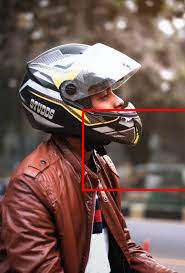

loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 64.0, 'y': 73.5, 'width': 36.0, 'height': 37.0, 'confidence': 0.7793430089950562, 'class': 'Helmet', 'class_id': 0, 'detection_id': '2eaefdf5-eceb-45a2-9be1-158927b5e490', 'image_path': 'uploaded_image.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '183', 'height': '275'}}
helmet found


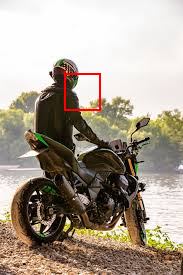

In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image, ImageDraw
from roboflow import Roboflow
import ipywidgets as widgets
from IPython.display import display

def predict_image(image):
    image_path = "uploaded_image.jpg"
    image.save(image_path)

    rf = Roboflow(api_key="tQY6mHRPxDlpqRqVZ2Aj")
    project = rf.workspace("deep-learning-sjxoy").project("helmet-detection-kkpno")
    version = project.version(1)
    model = project.version(1).model
    prediction = model.predict(image_path, confidence=40, overlap=30).json()

    # Print the prediction results
    print(prediction)

    if "predictions" in prediction and prediction["predictions"]:
        data = prediction
        class_value = data["predictions"][0]["class"]
        if class_value == "Helmet":
            result_label.value = "Helmet found"
            print("helmet found")
            img_with_boxes = image.copy()
            draw = ImageDraw.Draw(img_with_boxes)
            for prediction in data["predictions"]:
                if prediction["class"] == "Helmet":
                    x, y, w, h = prediction["x"], prediction["y"], prediction["width"], prediction["height"]
                    draw.rectangle([x, y, x+w, y+h], outline="red", width=2)

            # Display the image with bounding boxes
            display(img_with_boxes)
    else:
        result_label.value = "Helmet not found"
        print("helmet not found")

def on_file_upload(change):
    img = Image.open(BytesIO(uploader.data[-1]))
    predict_image(img)

uploader = widgets.FileUpload(accept='image/*', multiple=False)
uploader.observe(on_file_upload, names='_counter')

result_label = widgets.Label()

display(widgets.VBox([uploader, result_label]))
